In [1]:
import sys
sys.path.append('/workspace/fourth_year_project/HRTF Models/')

from HRIRDataset import HRIRDataset
from MainModel import MainModel 
from SeqModel import SeqModel
import matplotlib.pyplot as plt

In [2]:
sofa_file = '/workspace/fourth_year_project/HRTF Models/sofa_hrtfs/RIEC_hrir_subject_001.sofa'
hrir_dataset = HRIRDataset()
for i in range(99,100):
    hrir_dataset.load(sofa_file.replace('001', str(i).zfill(3)))

In [3]:
from torch.utils.data import DataLoader
import torch
# model = BackupWorkingModel()
model = SeqModel()
# Set the model to training mode
model.eval()

device = torch.device('cuda')
model = model.to(device)

batch_size = 1

dataloader = DataLoader(hrir_dataset, batch_size=batch_size, shuffle=True, num_workers=6)



/workspace/venv_work/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models/seq_models/model_98.pth'))
# model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models//model_98_step_scheded.pth'))

<All keys matched successfully>

In [5]:
# load in 1 sample from test set
sample = next(iter(dataloader))
src, tgt, angle = sample
src = src.to(device)
tgt = tgt.to(device)
angle = angle.to(device)
angle = angle.float()
src = src.float()
tgt = tgt.float()

# Get first sample from batch
src = src[0]
tgt = tgt[0]
angle = angle[0]

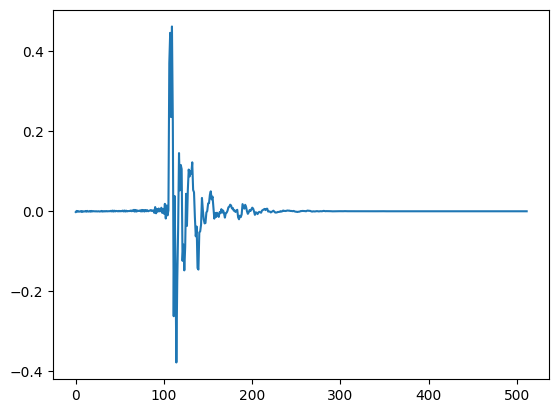

In [6]:
plt.plot(src[0].cpu().detach().numpy())


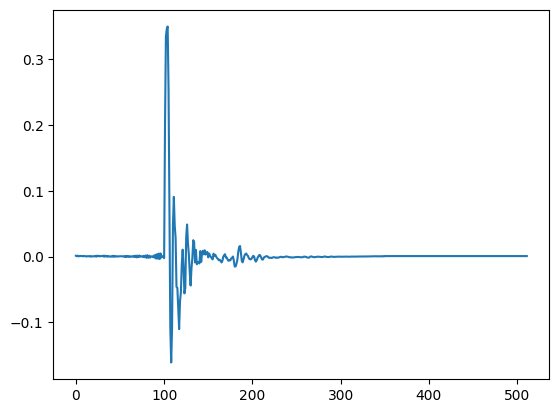

In [7]:
plt.plot(tgt[0].cpu().detach().numpy())

In [8]:
print(src.shape, angle.shape, tgt.shape)
print(angle)
# With target
output = model(src.unsqueeze(0), angle.unsqueeze(0), tgt.unsqueeze(0))
output  = output.squeeze(0)
output.shape

torch.Size([2, 512]) torch.Size([]) torch.Size([2, 512])
tensor(185., device='cuda:0')


torch.Size([3, 512])

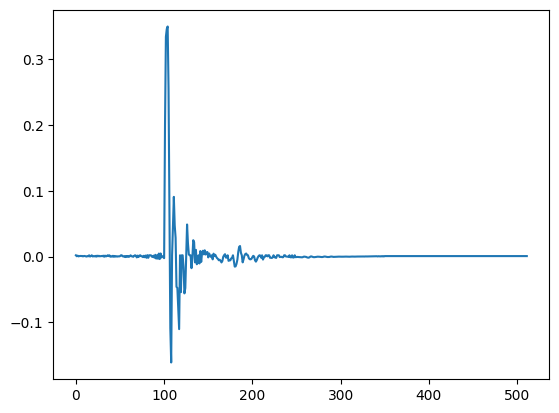

In [9]:
plt.plot(output[0].cpu().detach().numpy())

In [11]:
# Without target
output = model(src.unsqueeze(0), angle.unsqueeze(0))
print(output.shape)
output = output.permute(1, 2, 0)
output  = output.squeeze(0)
output.shape

torch.Size([1, 3, 512])


torch.Size([3, 512, 1])

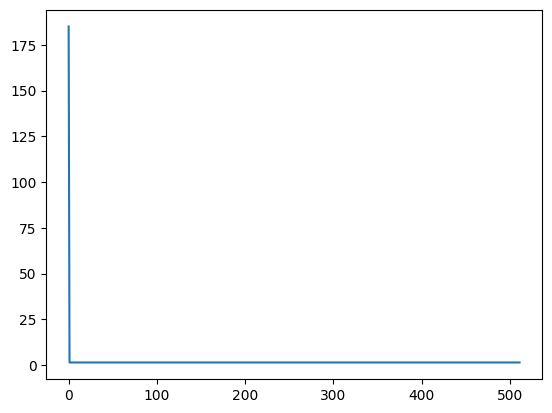

In [15]:
plt.plot(output[2].cpu().detach().numpy())

In [20]:
import torch.nn as nn

test_loss= nn.MSELoss()
print(output.shape, tgt.shape)

torch.Size([3, 512, 1]) torch.Size([2, 512])


In [22]:
a = output.permute(2, 0, 1).squeeze(0)[:-1,:]
b = tgt
a.shape, b.shape

(torch.Size([2, 512]), torch.Size([2, 512]))

In [23]:
test_loss(a,b)

tensor(0.0012, device='cuda:0')

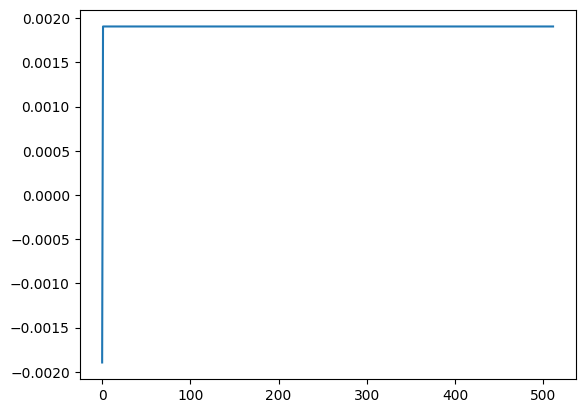

In [24]:
plt.plot(output[0].cpu().detach().numpy())

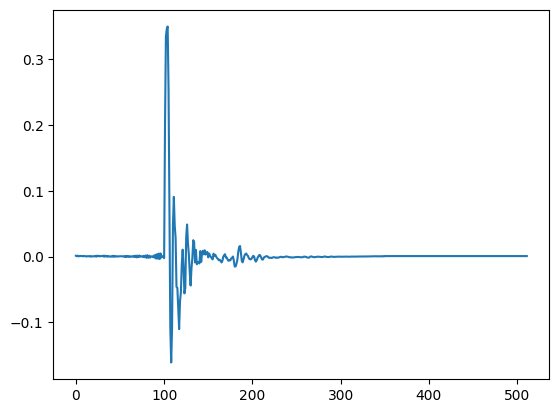

In [25]:
plt.plot(tgt[0].cpu().detach().numpy())

In [27]:
a

tensor([[-0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [ 0.0015,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020]],
       device='cuda:0')

In [28]:
b

tensor([[ 0.0012,  0.0004,  0.0014,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0003,  0.0010,  0.0001,  ...,  0.0003,  0.0003,  0.0003]],
       device='cuda:0')

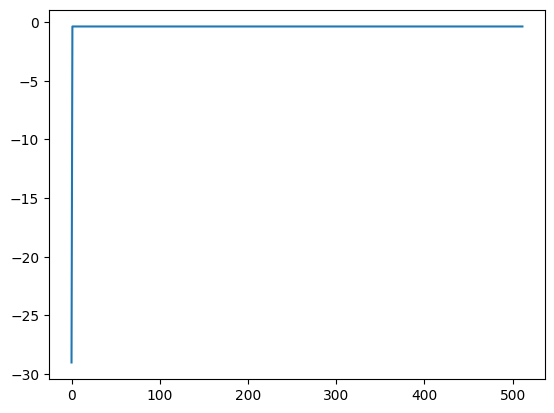

In [31]:
c = (a - a.mean()) / a.std() 
plt.plot(c[0].cpu().detach().numpy())

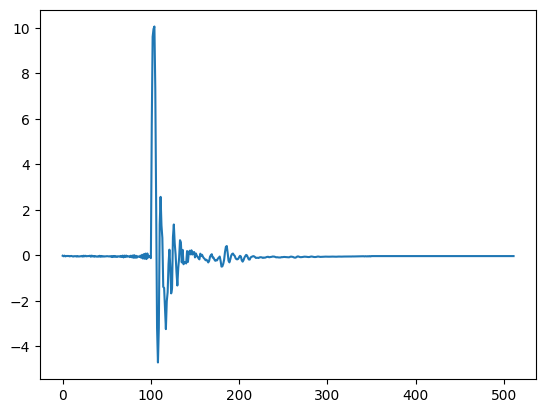

In [30]:
d = (b - b.mean()) / b.std()
plt.plot(d[0].cpu().detach().numpy())

In [32]:
test_loss(c,d)

tensor(1.9959, device='cuda:0')